In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style='white', color_codes=True)

In [2]:
data = pd.read_csv("/content/talking_data.csv")

In [3]:
# Showing overview of the dataset
data.head()

,ip,app,device,os,channel,click_time,attributed_time,is_attributed
0,87540,12,1,13,497,2017-11-07 09:30:38,NaN,0
1,105560,25,1,17,259,2017-11-07 13:40:27,NaN,0
2,101424,12,1,19,212,2017-11-07 18:05:24,NaN,0
3,94584,13,1,13,477,2017-11-07 04:58:08,NaN,0
4,68413,12,1,1,178,2017-11-09 09:00:09,NaN,0


In [4]:
# printing attributes (columns) name
print("Column Names:",data.columns.values)

Column Names: ['ip' 'app' 'device' 'os' 'channel' 'click_time' 'attributed_time'
 'is_attributed']


In [5]:
# Showing datatypes of the columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   ip               100000 non-null  int64 
 1   app              100000 non-null  int64 
 2   device           100000 non-null  int64 
 3   os               100000 non-null  int64 
 4   channel          100000 non-null  int64 
 5   click_time       100000 non-null  object
 6   attributed_time  227 non-null     object
 7   is_attributed    100000 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 6.1+ MB


In [6]:
# getting discriptive statistcs (Summary of the data)
data.describe()

,ip,app,device,os,channel,is_attributed
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000
mean,91255.879670,12.04788,21.771250,22.818280,268.832460,0.002270
std,69835.553661,14.94150,259.667767,55.943136,129.724248,0.047591
min,9.000000,1.00000,0.000000,0.000000,3.000000,0.000000
25%,40552.000000,3.00000,1.000000,13.000000,145.000000,0.000000
50%,79827.000000,12.00000,1.000000,18.000000,258.000000,0.000000
75%,118252.000000,15.00000,1.000000,19.000000,379.000000,0.000000
max,364757.000000,551.00000,3867.000000,866.000000,498.000000,1.000000


In [7]:
#Constructing correlation Matrix
corr = data.corr()
corr

,ip,app,device,os,channel,is_attributed
ip,1.000000,0.010400,-0.001499,-0.000470,0.007563,0.054955
app,0.010400,1.000000,0.248376,0.247160,-0.028238,0.064426
device,-0.001499,0.248376,1.000000,0.924456,-0.035398,-0.000695
os,-0.000470,0.247160,0.924456,1.000000,-0.033175,0.006183
channel,0.007563,-0.028238,-0.035398,-0.033175,1.000000,-0.023336
is_attributed,0.054955,0.064426,-0.000695,0.006183,-0.023336,1.000000


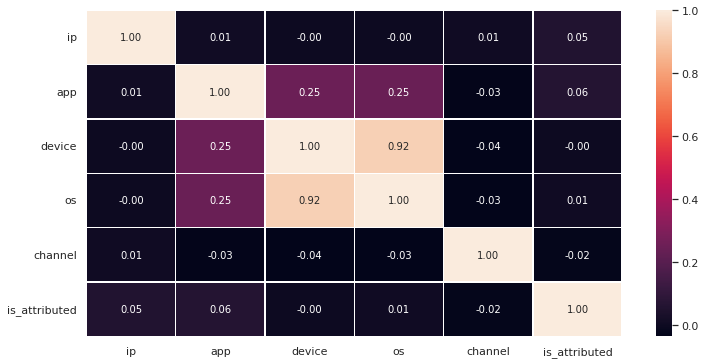

In [8]:
fig, ax = plt.subplots(figsize=(12,6)) 
sns.heatmap(data.corr(), annot=True, fmt=".2f",linewidths=.5,ax=ax)
plt.show()

In [9]:
## Absolute correlation value with is_attributed(Target variable)
abs(corr['is_attributed'])[:-1].sort_values(ascending = False)

app        0.064426
ip         0.054955
channel    0.023336
os         0.006183
device     0.000695
Name: is_attributed, dtype: float64

In [10]:
data.isna().sum()

ip                     0
app                    0
device                 0
os                     0
channel                0
click_time             0
attributed_time    99773
is_attributed          0
dtype: int64

In [11]:
data.drop('attributed_time',axis=1,inplace=True)

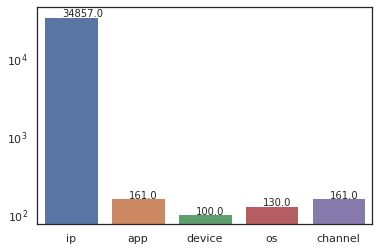

In [12]:
#Which column has maximum number of unique values present among all the available columns
cols = ['ip', 'app', 'device', 'os', 'channel']
uniques = [len(data[col].unique()) for col in cols]
ax =sns.barplot(cols, uniques, log=True)
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x()+p.get_width()/3, p.get_height()+0.1))

In [13]:
data['app'].value_counts()

3      18279
12     13198
2      11737
9       8992
15      8595
       ...  
407        1
145        1
271        1
398        1
92         1
Name: app, Length: 161, dtype: int64

In [14]:
from numpy.lib.function_base import quantile

In [15]:
apps=data.groupby('app').size().reset_index(name='count')
apps=apps[apps['count']>apps['count'].quantile(0.80)]
apps=apps.merge(data,on='app',how='inner')
apps.head()

,app,count,ip,device,os,channel,click_time,is_attributed
0,1,3135,17059,1,17,135,2017-11-09 01:17:58,0
1,1,3135,52432,1,13,115,2017-11-07 17:22:52,0
2,1,3135,89242,1,27,124,2017-11-07 09:37:21,0
3,1,3135,123994,1,19,101,2017-11-09 14:27:57,0
4,1,3135,34067,1,15,134,2017-11-07 15:06:06,0


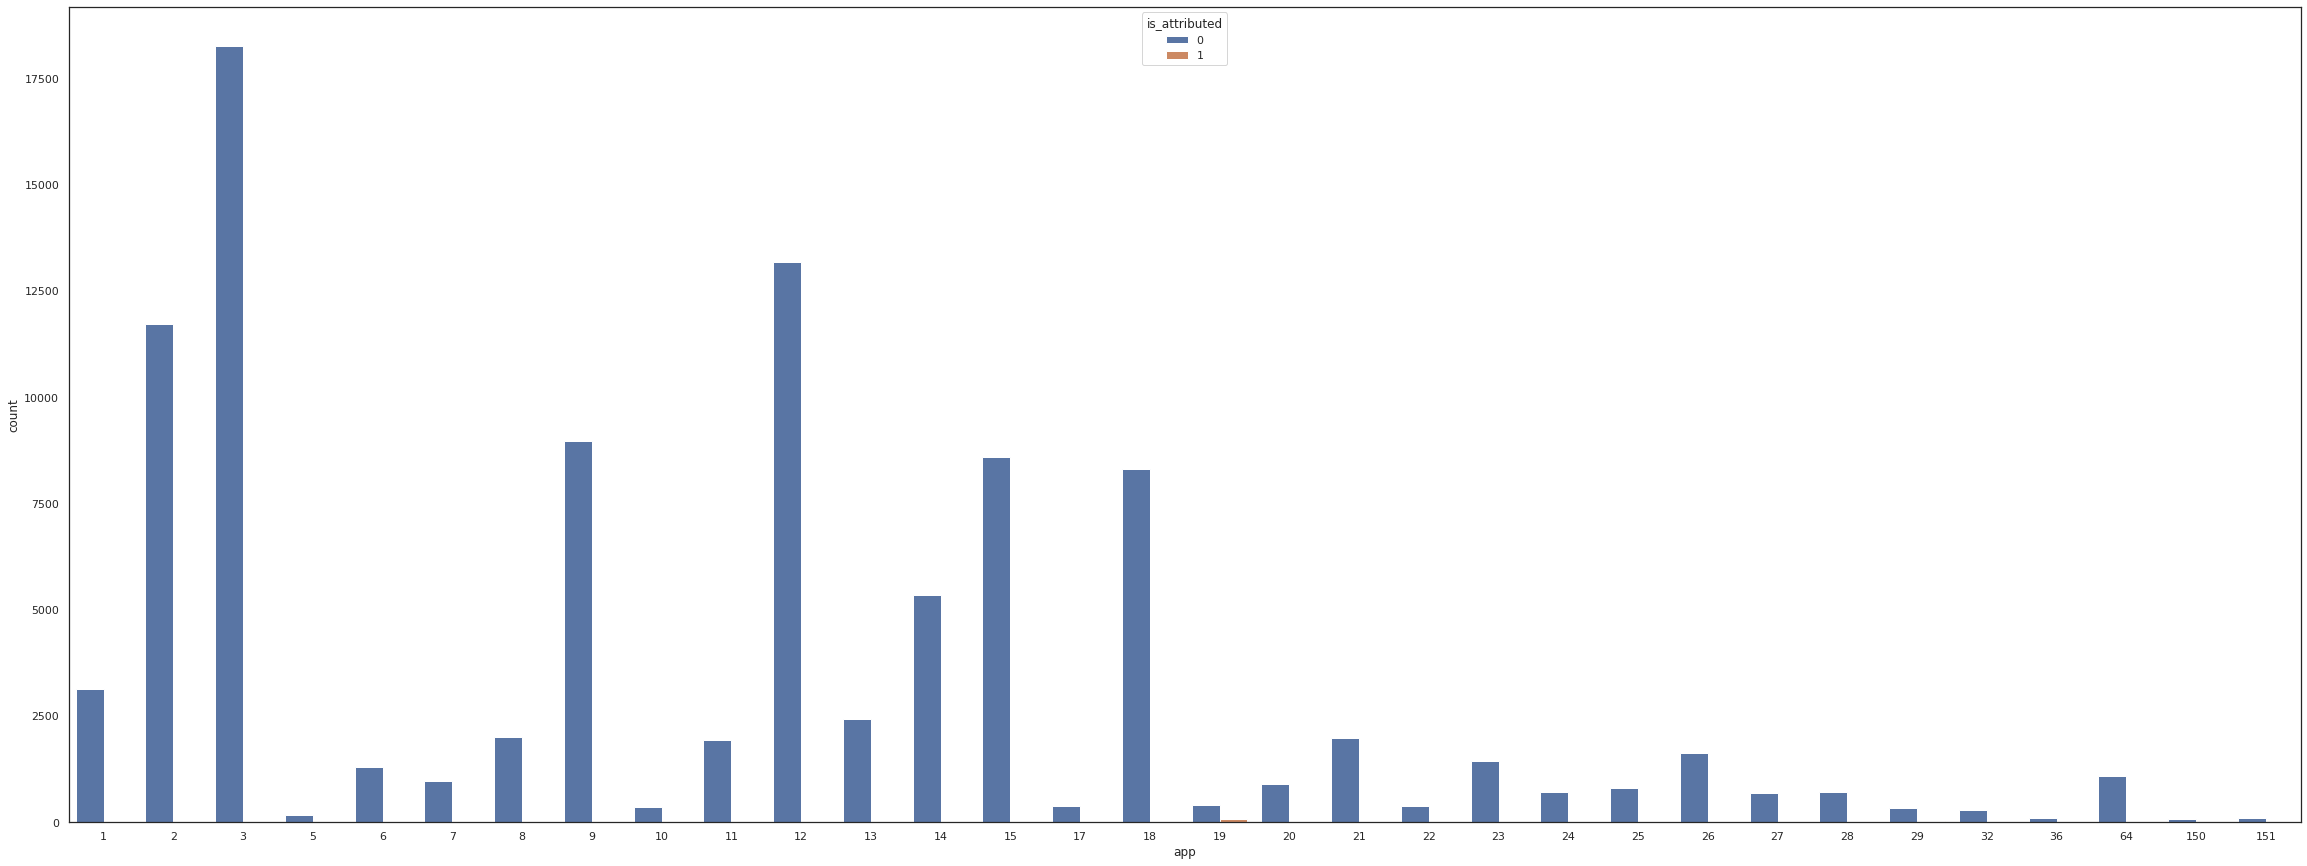

In [16]:
plt.figure(figsize=(40,15))
sns.countplot(x='app',hue='is_attributed',data=apps)

In [17]:
#By using Pandas derive new features such as - 'day_of_week' , 'day_of_year' , 'month' , and 'hour' as  float/int datatypes using the 'click_time' column . Add the newly derived columns in original dataset.**
import datetime
data['day_of_week'] = pd.to_datetime(data['click_time']).dt.day.astype('int')
data['day_of_year'] = pd.to_datetime(data['click_time']).dt.year.astype('int')
data['month'] = pd.to_datetime(data['click_time']).dt.month.astype('int')
data['hour'] = pd.to_datetime(data['click_time']).dt.hour.astype('int')


In [18]:
data.drop('click_time', axis=1, inplace=True)

In [19]:
data.head()

,ip,app,device,os,channel,is_attributed,day_of_week,day_of_year,month,hour
0,87540,12,1,13,497,0,7,2017,11,9
1,105560,25,1,17,259,0,7,2017,11,13
2,101424,12,1,19,212,0,7,2017,11,18
3,94584,13,1,13,477,0,7,2017,11,4
4,68413,12,1,1,178,0,9,2017,11,9


In [20]:
 # Divide the data into training and testing subsets into 80:20 ratio(Train_data = 80% , Testing_data = 20%) and check the average download rates('is_attributed') for train and test data, scores should be comparable.**
from sklearn.model_selection import train_test_split # # Import Sklearn package's data splitting function
X = data.drop(['is_attributed'], axis=1)
y = data['is_attributed']

# Split X and y into training and test set in 80:20 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [21]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(80000, 9) (20000, 9) (80000,) (20000,)


In [22]:
#Apply XGBoostClassifier with default parameters on training data and make first 10 prediction for Test data.  NOTE: Use y_pred = model.predict_proba(X_test) since we need probabilities to compute AUC
 #make predictions for test data
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train, y_train)


XGBClassifier()

In [23]:
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [24]:
#On evaluating the predictions made by the model what is the  with AUC/ROC score default hyperparameters.**
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 99.81%


In [25]:
from sklearn.metrics import confusion_matrix

In [26]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[19961,     0],
       [   37,     2]])

In [28]:
from imblearn.over_sampling import SMOTE 
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [31]:
sm = SMOTE(random_state=42)
X_sm, y_sm = sm.fit_resample(X, y)
print(f'''Shape of X before SMOTE: {X.shape}
Shape of X after SMOTE: {X_sm.shape}''')

Shape of X before SMOTE: (199546, 9)
Shape of X after SMOTE: (199546, 9)


In [32]:
X_train, X_test, y_train, y_test = train_test_split(
    X_sm, y_sm, test_size=0.25, random_state=42
)

In [33]:
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier()

In [37]:

preds = model.predict(X_test)
predictions = [round(value) for value in preds]

In [38]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 95.56%


In [40]:
cm=confusion_matrix(y_test,preds)
cm

array([[23911,   986],
       [ 1227, 23763]])

In [42]:
# auc scores
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
auc_score1 = roc_auc_score(y_test, preds)
print(auc_score1)


0.9556485975520465


Feature: 0, Score: 0.12940
Feature: 1, Score: 0.38530
Feature: 2, Score: 0.25436
Feature: 3, Score: 0.03468
Feature: 4, Score: 0.08129
Feature: 5, Score: 0.08375
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.03123


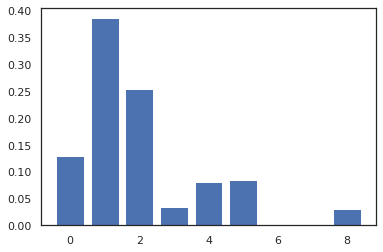

In [44]:
#Compute feature importance score and name the top 5 features/columns 
importance = model.feature_importances_
from matplotlib import pyplot
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [47]:
#Apply BaggingClassifier with base_estimator LogisticRegression and compute AUC/ROC score.
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(n_estimators=10, max_samples= .7, bootstrap=True)
bgcl = bgcl.fit(X_train, y_train)
test_pred = bgcl.predict(X_test)
bgcl_score=bgcl.score(X_test, y_test)
print("The Bagging classifier model accuracy is {}".format(bgcl_score))



The Bagging classifier model accuracy is 0.9974943372020767


In [50]:
cm_1=confusion_matrix(y_test,test_pred)
cm_1

array([[24815,    82],
       [   43, 24947]])

In [52]:
# auc scores
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
auc_score2 = roc_auc_score(y_test, test_pred)
print(auc_score2)

0.9974928711091617
